<h2><font color="#004D7F" size=6>Tratamiento de datos para MD (Parte I)</font></h2>



<h1><font color="#004D7F" size=5>Evaluación de Algoritmos</font></h1>

<br><br>
<div style="text-align: right">
<font color="#004D7F" size=3>Ing. Miguel Carlos Pita</font><br>
<font color="#004D7F" size=3>Modelizado de Minería de Datos</font><br>

---

<h2><font color="#004D7F" size=5>Índice</font></h2>
<a id="indice"></a>

* [1. Introducción](#section1)
    * [1.1. Librerías y CSV](#section11)
* [2. Métricas de clasificación](#section2)
    * [2.1. Accuracy](#section21)
    * [2.2. Kappa](#section22)
    * [2.3. Área bajo la curva ROC](#section23)
    * [2.4. Matriz de confusión](#section24)
    * [2.5. Precisión](#section25)
        * [2.5.1. Ejemplos](#section251)
    * [2.6. Recall](#section26)
        * [2.6.1. Ejemplos](#section261)
    * [2.7. F-Measure(F-1)](#section27)
        * [2.7.1. Ejemplos](#section271)
    * [2.8. Reporte de clasificación](#section28)
* [3. Métricas de regresión](#section3)
    * [3.1. Error medio absoluto](#section31)
    * [3.2. Error cuadrático medio](#section32)
    * [3.3. $R^2$](#section33)

---

<a id="section1"></a>
# <font color="#004D7F"> 1. Introducción</font>

El rendimiento de un modelo refleja la diferencia entre las predicciones de este para un conjunto de entradas X, y los valores Y esperados.
* Regresión: El error cuadratico medio, que se formula como:

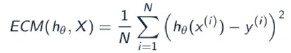

* Clasificación: La tasa de acierto/error:

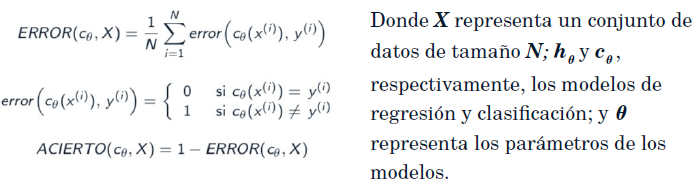

**ERROR en LiR (Regresion Lineal - Problema de Regresión) y LoR (Regresion Logística - Problema de Clasificación)**

Devuelven la configuracion de parámetros óptima, es decir, aquella que minimiza el error o coste con respecto a los datos utilizados en el aprendizaje.
El error del modelo aumenta (puede no ocurrir en algunos casos) en la prediccion de nuevos casos.

**Error predictivo**

* LiR

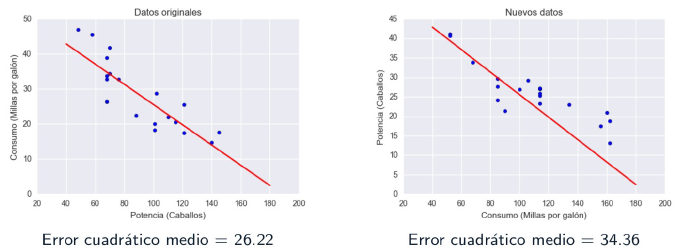

* LoR

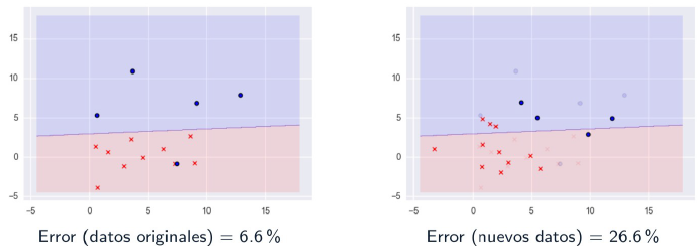

El conjunto de datos utilizado para aprender el modelo se denomina conjunto de entrenamiento.

En general, el rendimiento de un modelo sobre nuevos datos es peor que sobre el conjunto de entrenamiento.

**Rendimiento del modelo**: Corresponde al que presenta en la prediccion de nuevos casos.

La evaluación del modelo ha de hacerse sobre datos no hayan sido utilizados en ninguna fase del proceso entrenamiento

Las métricas que elige para evaluar sus algoritmos de Machine Learning son muy importantes. La elección de métricas influye en cómo se mide y compara el rendimiento de los algoritmos de Machine Learning. Influyen en cómo se valora la importancia de las diferentes características en los resultados y su elección final de qué algoritmo elegir. Veremos cómo seleccionar y utilizar diferentes métricas de rendimiento de Machine Learning en Python con scikit-learn.

En todas las pruebas se evalúan los mismos algoritmos, LoR para clasificación y LiR para problemas de regresión. Se utiliza una prueba de validación cruzada 10-folds para demostrar la mayoría de las métricas, porque este es el escenario más probable que utilizará al emplear diferentes métricas de evaluación de algoritmos. Para algunas pruebas se utiliza train test split.

**Importante:** Una vez que has evaluado los modelos utilizando técnicas como la validación cruzada, es una buena práctica entrenar el modelo seleccionado con todo el conjunto de datos disponibles. Esto se debe a que al entrenar con todos los datos, el modelo tiene más información para aprender y, por lo tanto, puede hacer mejores predicciones cuando se despliega en producción o se utiliza en nuevas predicciones. Durante el proceso de validación, el modelo se entrena solo con subconjuntos del conjunto de datos (k-folds), pero al final, para obtener un modelo más robusto, se entrena con todo el conjunto de datos.

<div class="alert alert-block alert-info">
    
<i class="fa fa-exclamation-circle" aria-hidden="true"></i>
En estas pruebas la función [`sklearn.model_selection.cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) es utilizada para informar el rendimiento en la mayoría de las pruebas.
</div> 

<div class="alert alert-block alert-info">
    
<i class="fa fa-exclamation-circle" aria-hidden="true"></i>
Puede obtener más información sobre las métricas de rendimiento del algoritmo de Machine Learning compatibles en la página [Model evaluation: quantifying the quality of predictions](http://scikit-learn.org/stable/modules/model_evaluation.html).
</div> 

<a id="section11"></a>
## <font color="#004D7F"> 1.1. Librerías y CSV</font>

Se muestran varias métricas de evaluación de algoritmos diferentes para problemas de Machine Learning de clasificación y regresión.
* **Clasificación**: se usará el conjunto de datos de Pima Indians Diabetes. Este es un problema de clasificación binaria donde todas las características de entrada son numéricas.

In [3]:
import pandas as pd
import numpy as np

ruta_clas = 'data/pima-indians-diabetes.data.csv'

nombres_clas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

df_clas = pd.read_csv(ruta_clas, names=nombres_clas)

array_clas = df_clas.values
X_clas = array_clas[:, 0:8] # Separamos del conjunto de datos la matriz X (variables independientes)
y_clas = array_clas[:, 8] # Separamos del conjunto de datos el vector y (variable dependientes)

In [5]:
df_clas

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [7]:
array_clas

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [9]:
X_clas

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [11]:
y_clas

array([1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 0., 0., 0.

### Vemos si la clase está desbalanceada

In [13]:
# Primera forma de observar el desbalance

df_clas.groupby('class').size()

class
0    500
1    268
dtype: int64

In [15]:
# Segunda forma de observar el desbalance

df_clas['class'].value_counts()

class
0    500
1    268
Name: count, dtype: int64

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<a id="section2"></a>
# <font color="#004D7F"> 2. Métricas de clasificación (Logistic Regression - LoR)</font>

Los problemas de clasificación son quizás el tipo más común de problema de Machine Learning y, como tal, tenemos diferentes métricas que se pueden utilizar para evaluar las predicciones de estos problemas. Revisaremos cómo usar las siguientes métricas:
* Accuracy.
* Cohen's Kappa.
* Área bajo la curva ROC. 
* Matriz de confusión.
* Informe de clasificación.

<a id="section21"></a>
## <font color="#004D7F"> 2.1. Accuracy (Porcentaje de Acierto)</font>

El accuracy de clasificación es el número de predicciones correctas realizadas como una relación de todas las predicciones realizadas. Es el porcentaje de instancias correctamente clasificadas de todas las instancias. Muy útil para la clasificación binaria pero no para clasificacion multiclase.

Puede ver que se informa la relación. Esto se puede convertir en un porcentaje multiplicando el valor en 100, dando una puntuación de precisión de aproximadamente el 77% de accuracy.

Esta métrica no es tan buena prediciendo cuando tengo las clases desbalanceadas.

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
En la nueva versión de sklearn establece que si se pone `random_state` hay que barajar los datos obligatoriamente cuando se utiliza `KFold()`. Por tanto, se debe poner `shuffle = true`.
</div>

In [23]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

kfold = KFold(n_splits=10, random_state=7, shuffle=True)
model = LogisticRegression(max_iter=1000)

scoring='accuracy'

resultado = cross_val_score(model, X_clas, y_clas, cv=kfold, scoring=scoring)
print(f"Accuracy: {resultado.mean()*100:.2f}% ({resultado.std()*100:.2f})")

Accuracy: 77.22% (4.97)


In [25]:
# 500 instancias de clase 0 --> utilizando accuracy se aciertan algunos
# 500 instancias de clase 1 --> utilizando accuracy se aciertan algunos
# CLASES BALANCEADAS --> Hay que utilizar la métrica Accuracy

# 1000 instancias de clase 0 --> imaginando que con accuracy se aciertan TODOS
# 100 instancias de clase 1 --> imaginando que con accuracy NO se acierta NADA
# Porcentaje de Acierto: +/- 90% (es engañoso)
# Tengo un DESBALANCE DE CLASES --> Hay que utilizar la métrica Cohen's Kappa

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
Aunque por defecto nos otorga esta métrica puede llamarse también a la clase [`accuracy_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html?highlight=accuracy\20metric#sklearn.metrics.accuracy_score).
</div>

<a id="section22"></a>
## <font color="#004D7F"> 2.2. Kappa</font>

Kappa o Cohen's Kappa se utiliza en problemas de clasificación y es una medida más útil para usar en problemas que tienen un desequilibrio en las clases (por ejemplo, una división del 70% al 30% para las clases 0 y 1, respectivamente, y puede alcanzar el 70% de precisión al predecir que todas las instancias son para la clase 0 pero ninguna para la clase 1).

En este ejemplo podemos observar como el modelo no era tan preciso como se podía observar en la métrica Accuracy. Al ser un dataset descompensado respecto al atributo clase y penalizando mediante está métrica podemos ver como el porcentaje disminuye considerablemente.

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import cohen_kappa_score

X_train, X_test, y_train, y_test = train_test_split(X_clas, y_clas, test_size=0.33, random_state=7)
model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)
predicciones = model.predict(X_test)

cohen_score = cohen_kappa_score(y_test, predicciones)
print(f"Cohen score: {cohen_score*100.0:.2f}%")

Cohen score: 52.42%


<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
Puede obtener más información en la documentación oficial de Scikit-Learn sobre la clase [`cohen_kappa_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.cohen_kappa_score.html?highlight=kappa#sklearn.metrics.cohen_kappa_score).
</div>

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<div style="text-align: right"> <font size=6><i class="fa fa-coffee" aria-hidden="true" style="color:#004D7F"></i> </font></div>